<a href="https://colab.research.google.com/github/HauwaUmar/DATA-6100/blob/main/Updated%206100%20Assignment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executive Summary

# Ethic Discussion

The dataset was provided by Kaggle and is fictional. However, if we are to push that aside. There are some issues with the provided dataset.
- Personal Information about the passengers i.e. their names were provided in the dataset and was unnecessary for our task. 

- The study of alternate dimensions is extensive and very specific and while conclusions might be made from our model it should be taken with a grain of salt if this happens in real life.


# Detailed Report

## I. Importing libraries

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import itertools

## II. Loading dataset

A train and test set were provided to achieve our goal, which will be loaded into dataframes for further analysis.

In [ ]:
#reading the held out train and test sets 
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

train_dataset.shape, test_dataset.shape

((8693, 14), (4277, 13))

We have 13 explanatory variables. The target is present in the train dataset but not the test dataset.

In [ ]:
# combine both testing and training dataset for data cleaning and transformation
whole_dataset = pd.concat((train_dataset, test_dataset)).reset_index(drop = True)

# storing the PassengerId for the test dataset
test_id = test_dataset['PassengerId']

print("The size of the train and test dataset combined: {}".format(whole_dataset.shape))

The size of the train and test dataset combined: (12970, 14)


## III. Exploratory Analysis

The goal is to predict who will and will not be transported. First, we'll conduct some analysis of the data.

Using a histogram, we check how the data in Transported column is distributed.

In [ ]:
#plotting a histogram for transported column
px.histogram(train_dataset,x="Transported",color="Transported",width=600,height=400)

There appears to be a balance between those who were transported and those who were not. The rest of the dataset will be explored further.

In [ ]:
# information about the dataset
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


There's a combination of numeric and non-numeric columns in the dataset and most columns have missing values which will be handled later.

In [ ]:
#statistical description of the data for non-numberic variables
whole_dataset.select_dtypes(include='object').describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378


The  table above shows that there are 3 unique Home Planets and Destinations with most passengers coming from Earth. CryoSleep and VIP are boolean values.Transported is our target variable which also contains boolean values.

In [ ]:
#statistical description of the data for numerical variables
whole_dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The table above depicts  the following:

- On average the age of people on the space ship is 28 with the youngest being 0(probably a new born baby) and the oldest being 79. 

- On average more money was spent at the food court compared to the other options [Room Service, Shopping Mall, Spa, VRDeck].

### CryoSleep

In [ ]:
# returning only rows were CryoSleep is not null
cryo_data = train_dataset[~train_dataset['CryoSleep'].isnull()]

#displaying a countplot for CryoSleep, grouped by whether a passenger was transported or not
px.histogram(cryo_data,x="CryoSleep",color="Transported",barmode="group",width=600,height=400)

Based on CryoSleep alone, most people who were not confined to their cabins were not transported. So this is might be an important observation.

### Home Planet

In [ ]:
# returning only rows were Home Planet is not null
planet_data = train_dataset[~train_dataset['HomePlanet'].isnull()]

#plotting count plot for each Home planet and grouped by Transported column
px.histogram(planet_data,x="HomePlanet",color="Transported",barmode="group",width=600,height=400)

Majority of the population in the spaceship is from earth. Since we wouldn't anticipate that your place of origin would affect whether you were transported (but who knows what we're dealing with), the distribution between the three planets is noteworthy. Therefore, we wonder if there is any context that is still needed.

### VIP

In [ ]:
# returning only rows were VIP is not null
vip_data = train_dataset[~train_dataset['VIP'].isnull()]


#plotting count plot for each VIP status and grouped by Transported column
px.histogram(vip_data,x="VIP",color="Transported",barmode="group",width=600, height=400)

It is obvious that a lot of people would not  be VIP's. However, it seems that the VIP status of a passenger did not play a huge role in whether or not a passenger got transported.

In [ ]:
# returning only rows were Destination is not null
destination_data = train_dataset[~train_dataset['Destination'].isnull()]


#plotting count plot for each Destination and grouped by Transported column
px.histogram(destination_data,x="Destination",color="Transported",barmode="group",width=600, height=400)

A lot of passengers planned to arrive at TRAPPIST-1e and more than 50% did not arrive. A higher percentage of passengers that planned to arrive at 55 Cancri e did arrive. And as for PSO J318.5-22, it is significantly equal; the percentage of passengers who arrived and those who didn't. 

### Cabin


In the data description it is stated that each passenger is either on the port side or starboard side on the Cabin. 

An example of the data in this column is 
- A/0/S
- B/0/P
 
There's a pattern present, each data point has 3 sections. The goal is to extract the last section of the pattern that represents the passenger's side.

In [ ]:
# spliting getting only the side the passengers cabin were located
train_dataset['Cabin']= train_dataset['Cabin'].apply(lambda x: str(x).split('/')[-1])

#Showing values in Cabin column
train_dataset['Cabin'].unique()

array(['P', 'S', 'nan'], dtype=object)

There is "nan" because there are none values but again that will be handled later.

In [ ]:
# returning only rows were Cabin is not null
cabin_data = train_dataset[train_dataset['Cabin'] != 'nan']

#plotting count plot for each Cabin and grouped by Transported column
px.histogram(cabin_data,x="Cabin",color="Transported",barmode="group",width=600, height=400)

It seems there is a higher chance you'd get transported than not transported if you are in the star board side compared to Port side which is the opposite

### Numeric Variables

The non-numeric variables have been explored, and the numeric variables will be analyzed using a heat map.

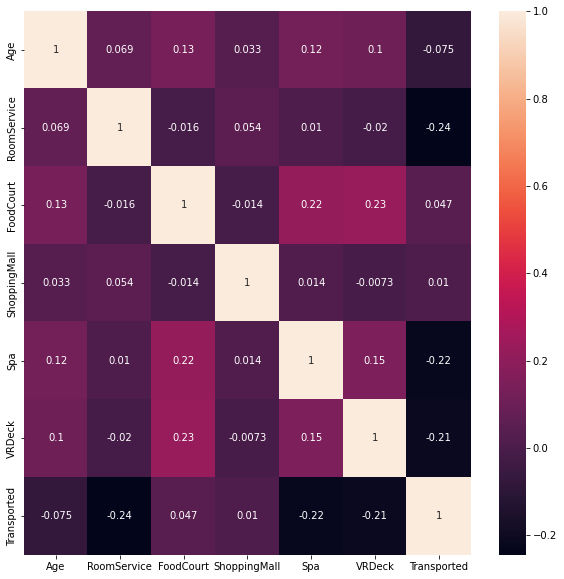

In [ ]:
#correlation matrix
corr=train_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

The diagram above depicts the correlation matrix between the numeric variables in the dataset using a heatmap. It is observed that there is no multicollinearity between the independent variables i.e.there is a weak correlation between the variables. 

## IV. Handling Missing Data

Remember we concatenated the train and test data set to a dataframe called "whole_dataset". This dataset will be used for data cleaning and preprocessing so both datasets can be the same when modelling.

In [ ]:
# this function will go through the data frame and return information on columns with missing values such as the number of missing data in
# each column and the percentage of missing value overall for each column
def info_on_missing_values(df):
  """
      Params: df: dataframe to find missing values from
      
      Returns: dataframe containing information on missing values of input df

  """
  total_missing_values = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
  percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
  data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
  decription_of_missing_values = pd.concat([total_missing_values, percentage, data_type], axis=1, keys=['Total Missing Val','Percentage','Data Type'])
  return decription_of_missing_values

# showing info on missing values for the wholedataset 
info_on_missing_values(whole_dataset.drop('Transported',axis=1))

,Total Missing Val,Percentage,Data Type
CryoSleep,310,2.39,object
ShoppingMall,306,2.36,float64
Cabin,299,2.31,object
VIP,296,2.28,object
Name,294,2.27,object
FoodCourt,289,2.23,float64
HomePlanet,288,2.22,object
Spa,284,2.19,float64
Destination,274,2.11,object
Age,270,2.08,float64


For each column not a lot of data is missing but if we decide to drop all the columns with na that would make us lose a lot of vital information. 

It is intuitive to think The Passenger ID is not useful for the prediction but the data description discussed some interesting patterns in the column. 

```
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and 
pp is their number within the group.People in a group are often family members, but not always.
```

Example of data in Passenger_id column:

- 0031_01
- 0031_02
- 0031_03

The id's above are for different passengers in the same group. Their group number is **0031** and there are three members in the group.


After critical analysis of the dataset, it is noticed that people from the same group come from the same home planet. Based on this observation, for each group of passengers any member with missing home planet takes on the value of fellow group members.

In [ ]:
#spliting the PassengerId feature into group and group number 
whole_dataset['group']= whole_dataset['PassengerId'].apply(lambda x: str(x).split('_')[0])
whole_dataset['group_no']= whole_dataset['PassengerId'].apply(lambda x: str(x).split('_')[1])

#filling the Nan values in HomePlanet by matching people from similar group as they seem to come from the same home planet
whole_dataset['HomePlanet'] = whole_dataset.groupby('group')['HomePlanet'].transform('first')

In [ ]:
#checking info on missing values
info_on_missing_values(whole_dataset.drop('Transported',axis=1))

,Total Missing Val,Percentage,Data Type
CryoSleep,310,2.39,object
ShoppingMall,306,2.36,float64
Cabin,299,2.31,object
VIP,296,2.28,object
Name,294,2.27,object
FoodCourt,289,2.23,float64
Spa,284,2.19,float64
Destination,274,2.11,object
Age,270,2.08,float64
VRDeck,268,2.07,float64


The percentage of missing values in Home Planet reduced from 2.22% to 1.21%. This is because passengers that belonged to groups with one member and still had  missing values in Home Planet were left empty.


\\

The rest of the missing values will be filled with the mode or mean 
of the columns for object and numeric variables.

In [ ]:
# making a list of columns with missing values
missing_val_cols = whole_dataset.columns[whole_dataset.isna().any()]

# filling columns with missing values with mean or mode
for col in missing_val_cols:
  if whole_dataset[col].dtype == 'object':
      whole_dataset[col]= whole_dataset[col].fillna(whole_dataset[col].mode()[0])
  else:
      whole_dataset[col] = whole_dataset[col].fillna(whole_dataset[col].mean())

info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type


We have handled all the missing values :)

## V. Data Preprocessing

After handling the missing values, the non-numeric variables need to be transformed to numeric varables for our model.

In [ ]:
#showing non-numeric columns
whole_dataset.select_dtypes(include=['object','bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,group,group_no
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter,True,9266,02
12966,9269_01,Earth,False,G/160/P,TRAPPIST-1e,False,Matty Scheron,True,9269,01
12967,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore,True,9271,01
12968,9273_01,Europa,False,D/297/P,TRAPPIST-1e,False,Kitakan Conale,True,9273,01


There are 7 non-numeric columns. The 

- The PassengerId and Name columns are insignificant and will be dropped.
- The Home Planet column will be transformed to dummy variables to take account of the three home planets.
- The Destination column will be transformed to dummy variables to take account of the three destinations.
- The VIP, CryoSleep, Transported column will be transformed using a label encoder.
- The same transformation done in Cabin column during the exploratory analysis will be carried out here and then will be transformed using a label encoder.
- The group and group_no columns will be converted to integers.


In [ ]:
# dropping the passenger id and the name 
whole_dataset.drop(['PassengerId','Name'],axis=1,inplace=True)

# label encoder object
le = preprocessing.LabelEncoder()

#list of columns with bool values
bool_columns = ['CryoSleep','VIP','Transported']

# assign labels of 0 and 1 to values in column
for col in bool_columns:
    whole_dataset[col]=le.fit_transform(whole_dataset[col])

 # list of columns with categorical datatype
categorical_columns = ['HomePlanet','Destination']

# creating dummy variables for the categorical columns
whole_dataset = pd.get_dummies(whole_dataset, prefix=categorical_columns, columns=categorical_columns)

# splitting cabin column to get only Cabin side
whole_dataset['Cabin']= whole_dataset['Cabin'].apply(lambda x: str(x).split('/')[-1])
# label encoding (changing the value in Cabin from S to 1 and P to 0)
whole_dataset= whole_dataset.replace({"Cabin":{'P':0,'S':1}})

whole_dataset['group'] = whole_dataset['group'].astype(str).astype(int)
whole_dataset['group_no'] = whole_dataset['group_no'].astype(str).astype(int)

print("The shape of the whole dataset after transformation: {}".format(whole_dataset.shape))

The shape of the whole dataset after transformation: (12970, 18)


In [ ]:
# checking data type of columns in whole_dataset
whole_dataset.dtypes

CryoSleep                      int64
Cabin                          int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Transported                    int64
group                          int64
group_no                       int64
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
dtype: object

All the non-numeric variables have been transformed to integers.